In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [10]:
#training 
train=pd.read_csv("C:\\Users\\thato\\Downloads\\train (1).csv")
#shape
train.shape

(891, 12)

In [11]:
#testing
testing=pd.read_csv("C:\\Users\\thato\\Downloads\\test (1).csv")
#shape
testing.shape

(418, 11)

In [12]:
#Importing the testing data
testing.info()
testing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
#importing the training data
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Head of the train data
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
#print out
print(train.isna().sum())
print(train.shape)
print('')
print(train.isna().sum())
print(train.shape)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [16]:
print(train.dtypes)
print('')
testing.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [18]:
train.iloc[:, 1:].describe().T.sort_values(by='std', ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000


In [21]:
print(f"Number of duplicates in the train set: {train.duplicated().sum()},{train.duplicated().sum()/train.shape[0]*100}")

Number of duplicates in the train set: 0,0.0


Text(0.5, 1.0, 'Target Distribution')

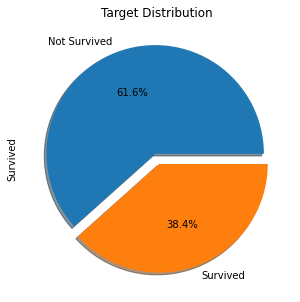

In [23]:
plt.figure(figsize=(5,5))

train["Survived"].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', labels=["Not Survived","Survived"], shadow=True).set_title("Target Distribution")

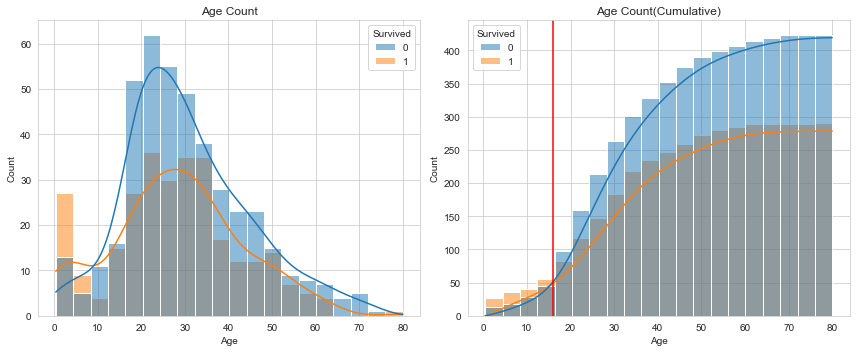

In [30]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))
sns.set_style("whitegrid")

sns.histplot(data=train, x="Age", ax=axes[0], hue="Survived", kde=True)
sns.histplot(data=train, x="Age", ax=axes[1], hue="Survived", kde=True, cumulative = True)

axes[1].axvline(x=16, color="r", linestyle = "-")
axes[0].set_title("Age Count")
axes[1].set_title('Age Count(Cumulative)')

plt.tight_layout()

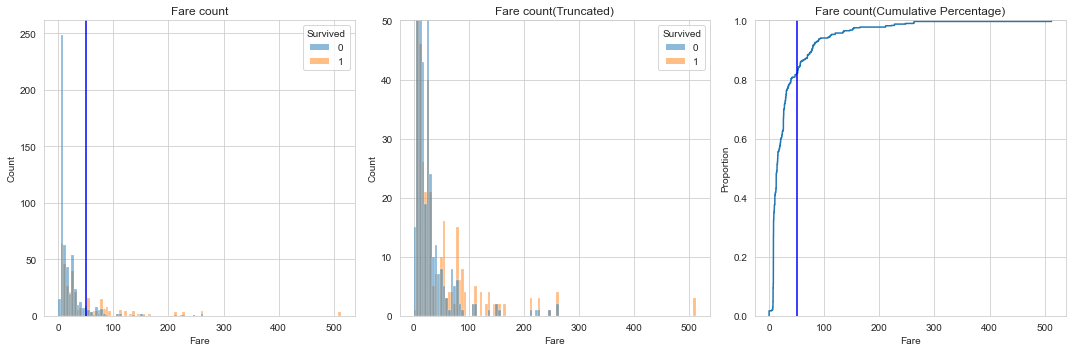

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#first axes
sns.histplot(data=train, x="Fare", ax=axes[0], hue="Survived")
sns.histplot(data=train, x="Fare", ax=axes[1], hue="Survived")
axes[1].set_ylim([0, 50])
axes[0].axvline(x=50, color= 'b', linestyle= "-")

#axes3
sns.ecdfplot(data=train, x="Fare", ax=axes[2])
axes[2].axvline(x=50, color='b', linestyle= "-")

#axes 1, 2, 3
axes[0].set_title("Fare count")
axes[1].set_title("Fare count(Truncated)")
axes[2].set_title("Fare count(Cumulative Percentage)")

plt.tight_layout()